In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ljet_data = pd.read_csv('jet_data/ljet_train.csv')
cjet_data = pd.read_csv('jet_data/cjet_train.csv')
bjet_data = pd.read_csv('jet_data/bjet_train.csv')

jet_data = pd.concat([ljet_data, cjet_data, bjet_data], axis=0).reset_index(drop=True)
n_labels = jet_data['mc_flavour'].unique()
print('List of different labels = ', n_labels)

# associate to each label a name
flavour_labels = {0: 'light jets', 4: 'charm jets', 5: 'bottom jets'}
for flavour, name in flavour_labels.items():
    print(f'Label {flavour}: {name}')

flavour_palette = {0:'blue', 4:'orange', 5:'red'}

List of different labels =  [0 4 5]
Label 0: light jets
Label 4: charm jets
Label 5: bottom jets


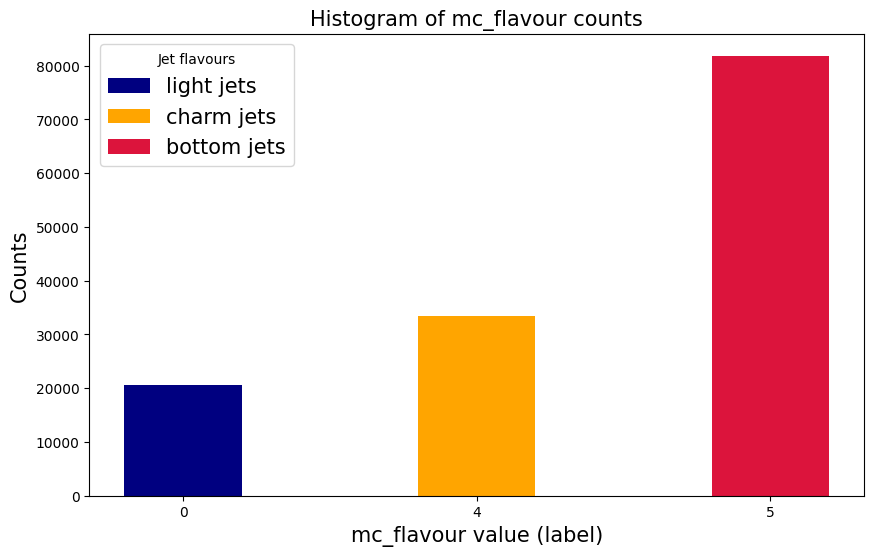

mc_flavour
0    20673.0
4    33505.0
5    81852.0
Name: count, dtype: float64
Bottom-light jets ratio =  3.9593672906689887
Charm-light jets ratio =  1.6207130073042133


In [8]:
df_description = jet_data.groupby('mc_flavour').describe()
label_counts = df_description['PT']['count']

# plot counts vs mc_flavour value to understand how many data for each class we have
plt.figure(figsize=(10,6))
bars = plt.bar(x=label_counts.index.astype(str), height=label_counts.values, width=0.4, color=['navy', 'orange', 'crimson'])
plt.title('Histogram of mc_flavour counts', fontsize=15)
plt.xlabel('mc_flavour value (label)', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=0)
plt.legend(bars, flavour_labels.values(), title="Jet flavours", fontsize=15)
plt.show()

print(label_counts)

bl_ratio = label_counts[5]/label_counts[0]
cl_ratio = label_counts[4]/label_counts[0]

print('Bottom-light jets ratio = ', bl_ratio)
print('Charm-light jets ratio = ', cl_ratio)

In [17]:
def plot_feature(feature:str, mc_filter:int=None, xlabel:str=None, ylabel:str='Counts', yscale:str='linear', 
                 nbins:int=30, multiple:str='layer', element='step') -> None:
    
    plt.figure(figsize=(10,6))

    data_to_plot = jet_data if mc_filter is None else jet_data[jet_data['mc_flavour'] == mc_filter]

    # plot 3 histograms considering that feature for all the class in the dataset
    sns.histplot(data=data_to_plot, 
                 x=feature, 
                 hue=mc_filter if mc_filter is not None else 'mc_flavour',
                 multiple=multiple,
                 stat='count',
                 common_norm=True,
                 kde=False,
                 bins=nbins, 
                 palette=flavour_palette if mc_filter is None else [flavour_palette[mc_filter]],
                 element=element,  # makes bars outlined (no fill)
                 fill=False if element == 'step' else True,  # ensures bars are only outlined
                 linewidth=1.5,
                 alpha=1
                )
    
    """
    # plot 3 histograms considering that feature for all the class in the dataset 
    sns.kdeplot(data=data_to_plot, 
                 x=feature, 
                 hue=mc_filter if mc_filter is not None else 'mc_flavour',
                 multiple=multiple,
                 common_norm=True,
                 palette=flavour_palette if mc_filter is None else [flavour_palette[mc_filter]],
                )
    """
    
    plt.title(f'Distribution of {feature} grouped by mc_flavour', fontsize=15)
    plt.xlabel(feature if xlabel is None else feature+xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.yscale(yscale)

    # custom legend. Associate to each mc_flavour a the corresponding jet flavour name
    custom_handles = [
        plt.Line2D([0], [0], color=flavour_palette[0], lw=4),
        plt.Line2D([0], [0], color=flavour_palette[4], lw=4),
        plt.Line2D([0], [0], color=flavour_palette[5], lw=4),
    ]
    
    plt.legend(custom_handles, flavour_labels.values(), title='Jet flavours', fontsize=15)
    plt.show()

## Understand which features are more important than others. Plot some features for each class

Consider a subset of all the features and plot them for each `mc_flavour` of the dataset. I am considering the features that should be more important for jet classification according to papers/literature

Let's consider the list of all the features contained in the jet dataset and plot feature by feature for all three different `mc_flavour`. Considerations based on features plot:

- **PT:** the distribution of the transverse momentum of a light jet seems to have more tails wrt to those of HF jets. Higher values of PT $\rightarrow$ more likely to be a light flavour jet? **To be checked**

- **drSvrJet:** $\Delta R$ between SV and jet. For HF we should expect small values, because heavy quarks decay and the SV should be close (correlated) to the jet. The distributions are very similar, but for light jets we see more entries for high $\Delta R$ values

- **m:** distribution of the mass of the SV. All three seem to be very similar

- **nTrkJet:** probably the number of tracks in the jet. Is it possible to see that bottom jets dominate for high values of nTrkJet. The same can't be stated by looking at **nTrk** distributions. As written in the notes these two should be a lot of times the same

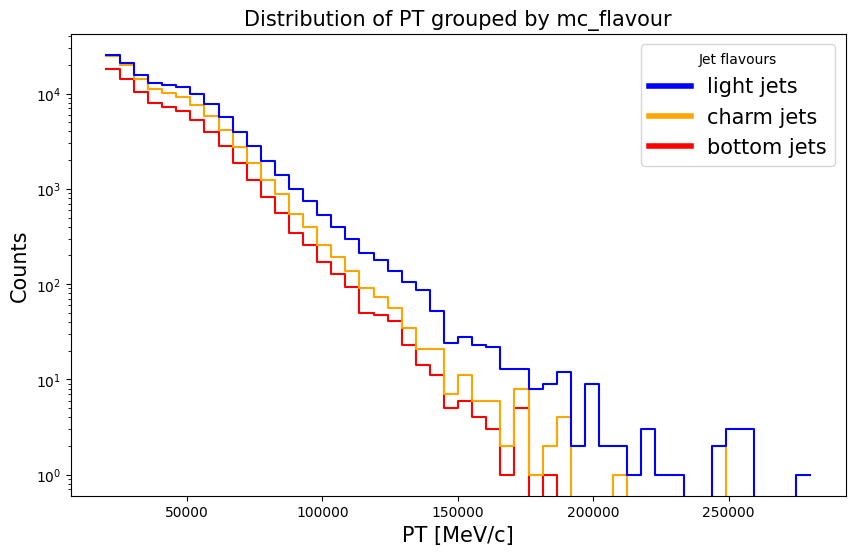

In [18]:
plot_feature('PT', yscale='log', nbins=50, multiple='stack', xlabel=' [MeV/c]')

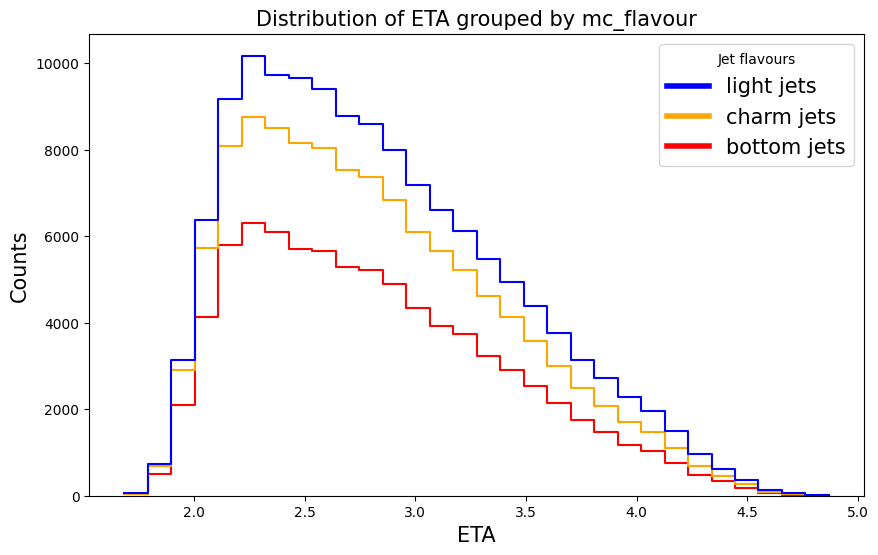

In [19]:
plot_feature('ETA', multiple='stack')

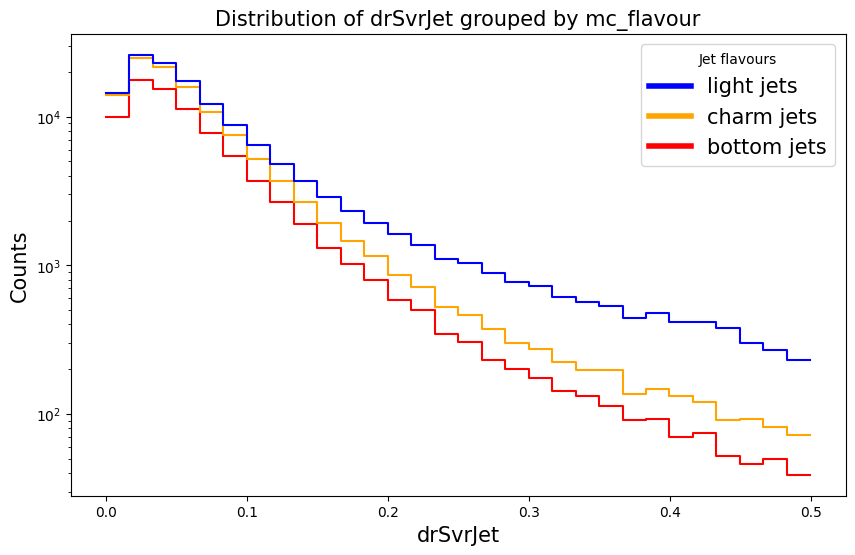

In [20]:
plot_feature('drSvrJet', yscale='log', multiple='stack')

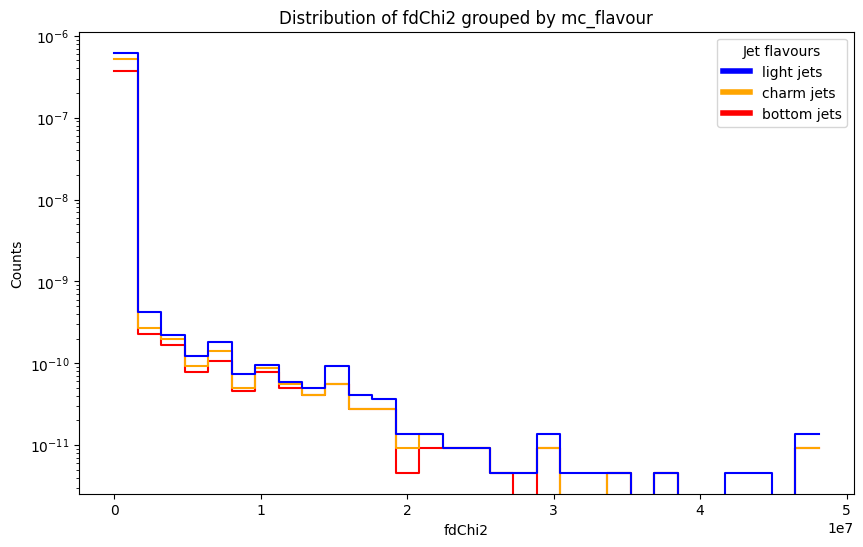

In [8]:
plot_feature('fdChi2', yscale='log', multiple='stack')

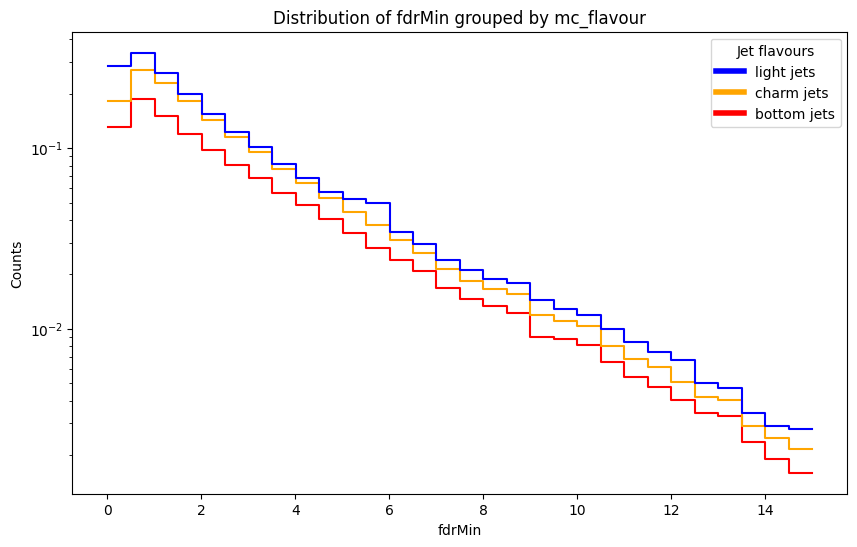

In [9]:
plot_feature('fdrMin', yscale='log', multiple='stack')

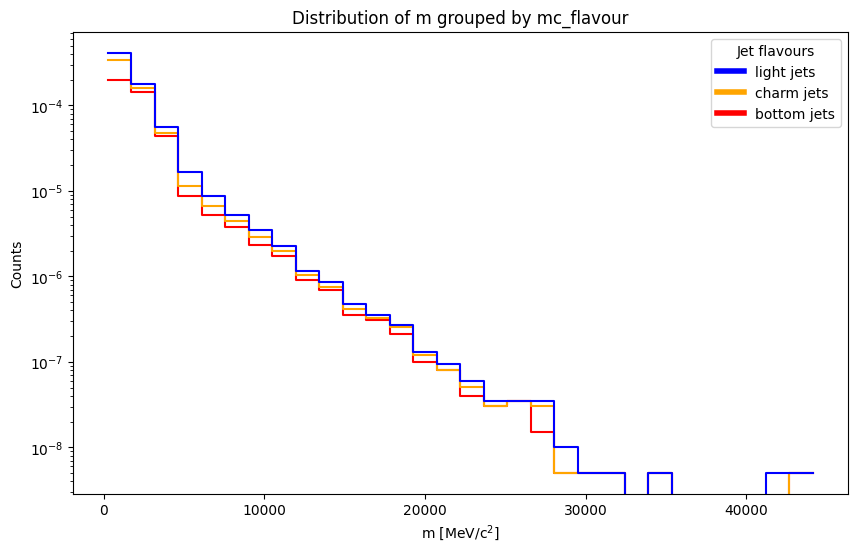

In [10]:
plot_feature('m', yscale='log', multiple='stack', xlabel=r' [MeV/c$^2$]')

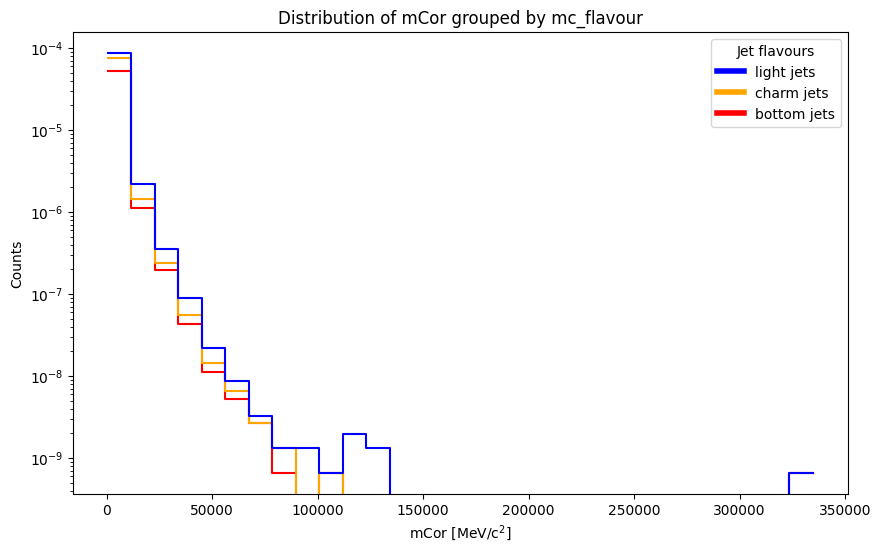

In [11]:
plot_feature('mCor', yscale='log', multiple='stack', xlabel=r' [MeV/c$^2$]')

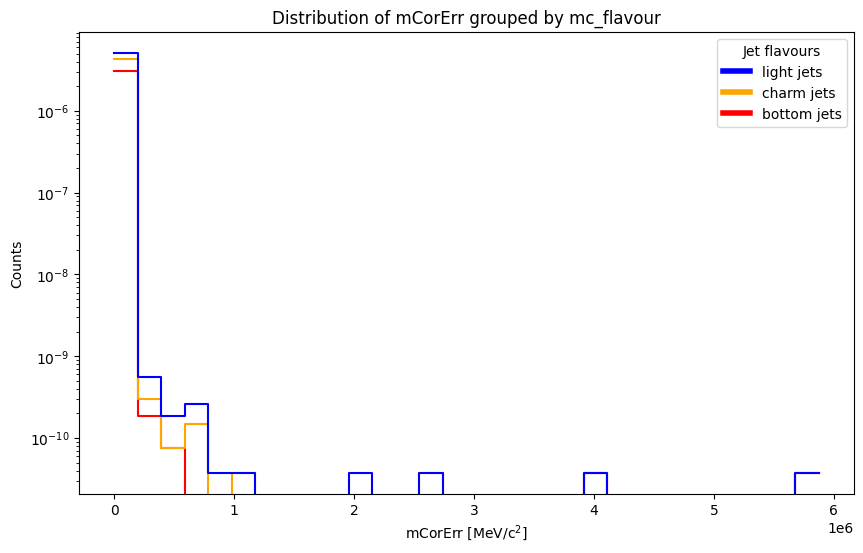

In [12]:
plot_feature('mCorErr', yscale='log', multiple='stack', xlabel=r' [MeV/c$^2$]')

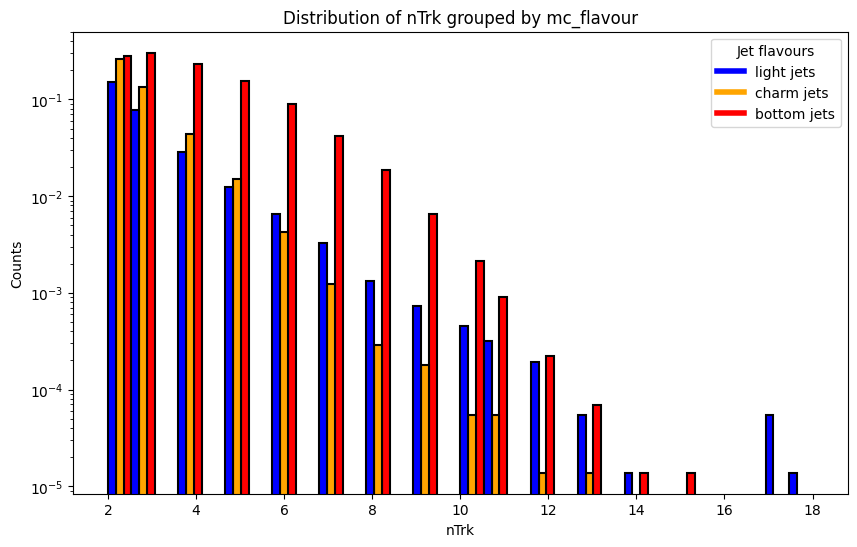

In [13]:
plot_feature('nTrk', yscale='log', multiple='dodge', element='bars')

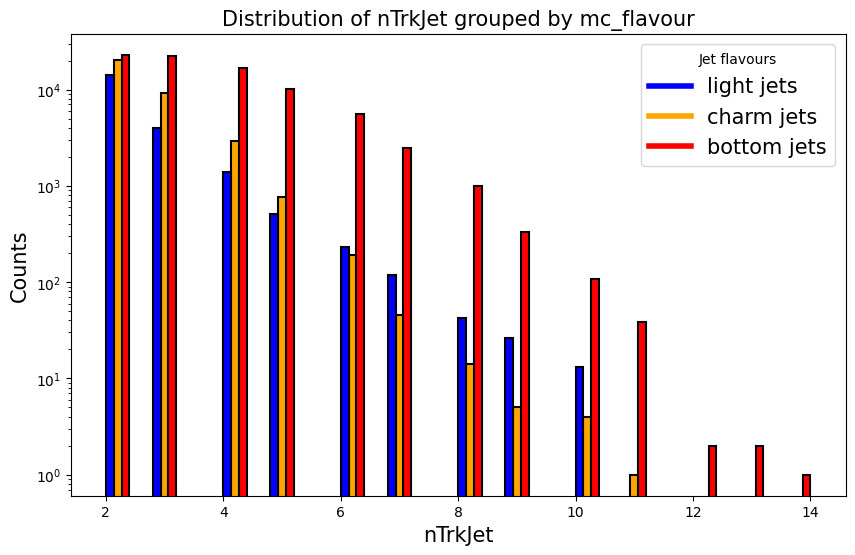

In [21]:
plot_feature('nTrkJet', yscale='log', multiple='dodge', element='bars')

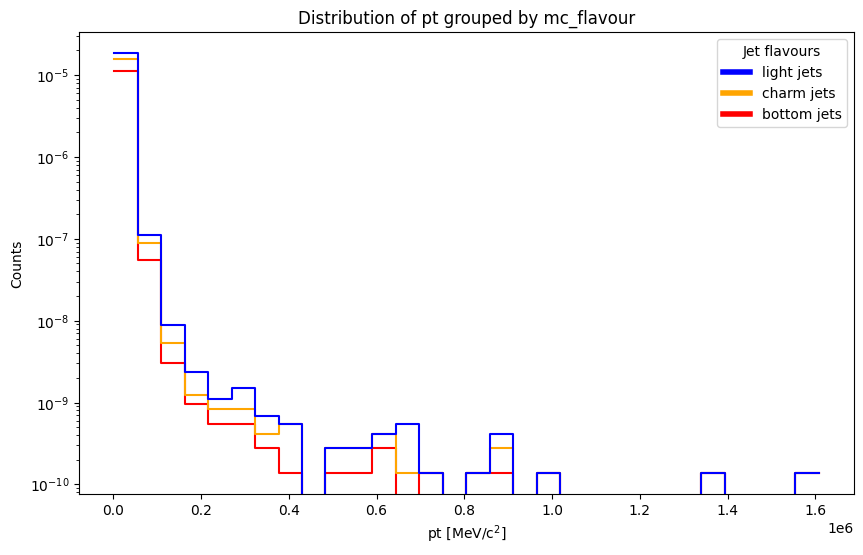

In [15]:
plot_feature('pt', yscale='log', multiple='stack', xlabel=r' [MeV/c$^2$]')

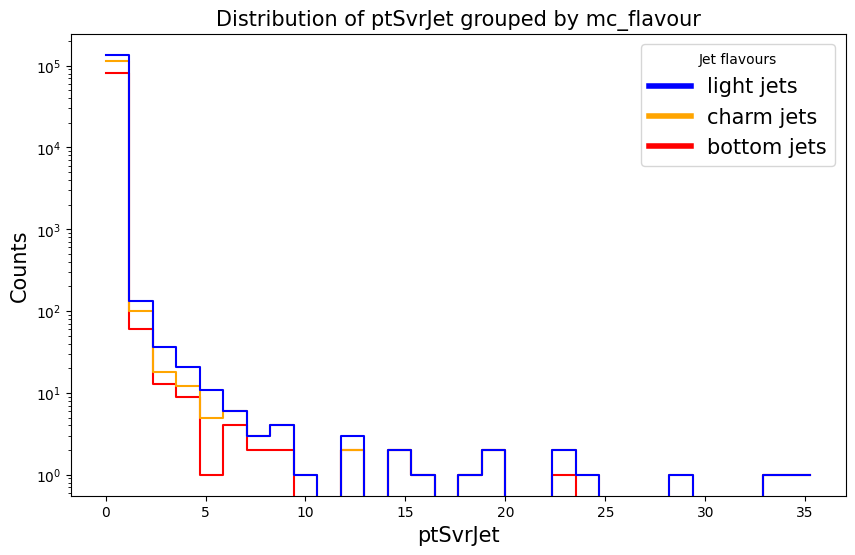

In [22]:
plot_feature('ptSvrJet', yscale='log', multiple='stack')

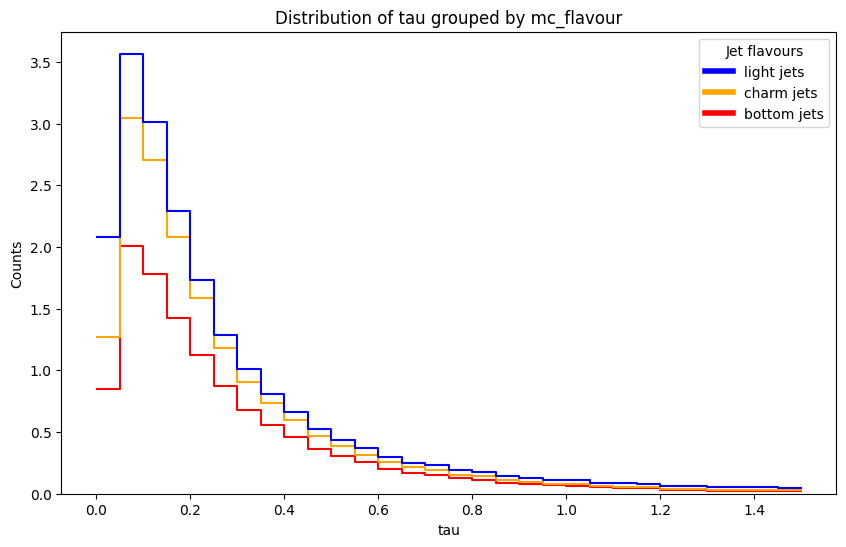

In [17]:
plot_feature('tau', multiple='stack')

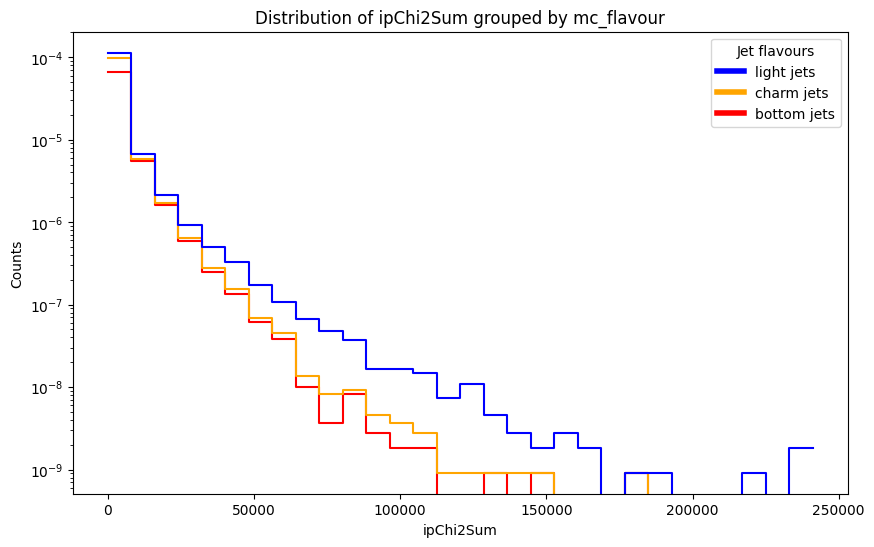

In [18]:
plot_feature('ipChi2Sum', yscale='log', multiple='stack')